# <span style="color:red; font-family: Arial;">Forecasting - Airline data</span>

# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf , adfuller
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">* Forecast the CocaCola prices Passengers data set </h3>
<h3 style="color:blue; font-family: Arial;">* Prepare a document for each model explaining how many dummy variables you have  created and RMSE value for each model.<h3>


# 2 - Data Collection

In [2]:
df = pd.read_excel('./Airlines+Data.xlsx',parse_dates=True,index_col=0)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# 3 - EDA / VISUALIZATION / DATA PREPROCESSING

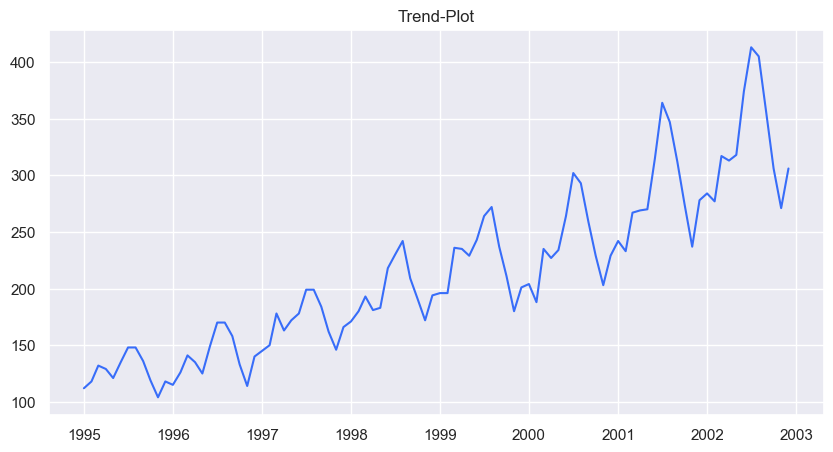

In [3]:
plt.plot(df.index,df['Passengers'].values)
plt.title('Trend-Plot')
plt.show()

In [4]:
adf = adfuller(df['Passengers'])
adf[1]

0.9968250481137263

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can clearly see that there is upward trend and multiplicative seasonality.<h3>

<h2 style="color:red; font-family: Arial;">ARIMA Models can only work with stationary data.</h2>

In [5]:
# Differencing
df['First Order'] = df['Passengers'].diff()
df

,Passengers,First Order
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


###  _Differencing is used to stationaries any data_


In [6]:
df.dropna(inplace=True)

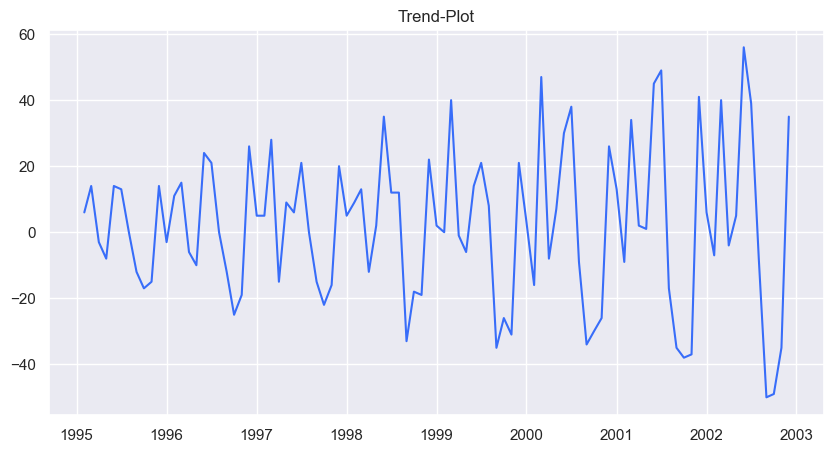

In [7]:
plt.plot(df.index,df['First Order'].values)
plt.title('Trend-Plot')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can observe that we can see seasonality but not trend<h3>

In [8]:
# Differencing
df['Second Order'] = df['First Order'].diff()
df

,Passengers,First Order,Second Order
Month,,,
1995-02-01,118,6.0,NaN
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
1995-06-01,135,14.0,22.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


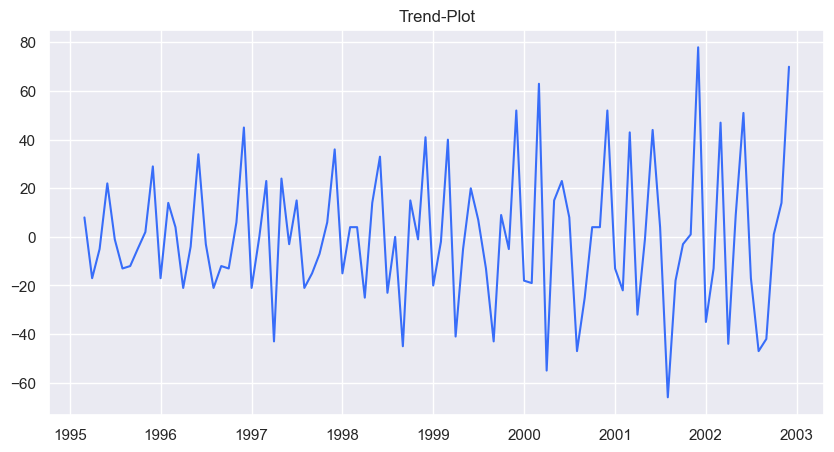

In [9]:
plt.plot(df.index[1:],df['Second Order'][1:].values)
plt.title('Trend-Plot')
plt.show()

# 4 - ACF & PACF

In [10]:
## ACF
acfs = acf(df['First Order'],nlags=45)
acfs

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974,
       -0.26552083, -0.10683151, -0.08961871,  0.19831711,  0.59475663,
        0.15739664, -0.1369987 , -0.10344961, -0.13096447, -0.02505866,
       -0.00662128, -0.08250718, -0.22624586, -0.09910585, -0.03923083,
        0.14510127,  0.4660735 ,  0.12708421, -0.12395757, -0.09104568,
       -0.04940115, -0.00886327,  0.01779425, -0.07120724, -0.19944311,
       -0.08127591])

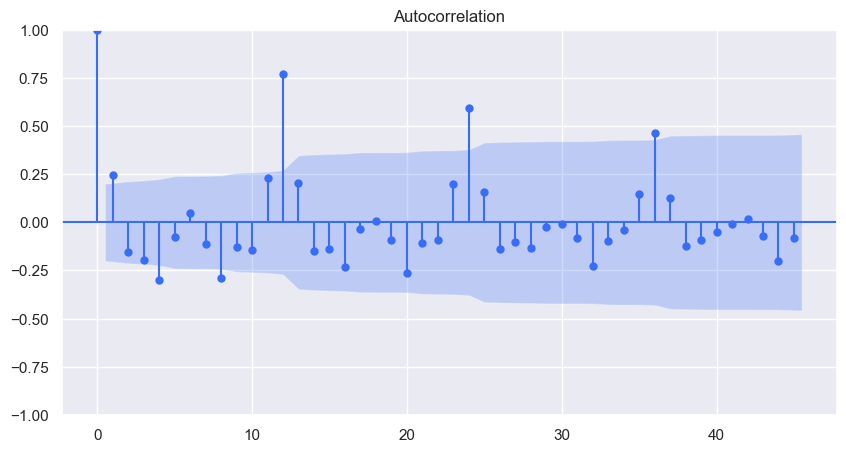

In [11]:
plot_acf(df['First Order'],lags=45);

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> Significant change over the interval of 12 lags variable<h3>

In [12]:
# PACF
pacfs = pacf(df['First Order'],nlags=45)
pacfs

array([ 1.00000000e+00,  2.49822741e-01, -2.36758342e-01, -1.03692905e-01,
       -3.01485928e-01,  2.23374632e-02, -8.40227411e-02, -2.53404035e-01,
       -4.46435582e-01, -2.23664740e-01, -6.53266123e-01, -3.65821471e-01,
        5.90496055e-01, -1.20748181e-01, -2.79572058e-01,  2.59046851e-01,
        4.43131573e-04, -1.03548748e-01, -2.89705180e-01,  3.92893315e-01,
       -4.00372172e-01, -6.35954886e-01,  6.90587647e-01,  2.54954166e-01,
       -4.52753578e+00, -3.11339919e-01, -1.10232895e+00, -2.55850745e-01,
       -4.03828557e-01, -2.07626547e+00,  1.63128599e+00,  8.09825837e-01,
        7.37562126e-02, -1.16969505e-01,  6.00458343e-01,  4.36387543e-01,
       -8.23191758e-01,  1.57284745e+00, -1.25167977e+00, -1.96513870e+01,
        1.02256141e+00, -6.34356709e-01,  4.25461634e-01,  5.24037327e-01,
       -3.14429541e-02, -1.07330657e-02])

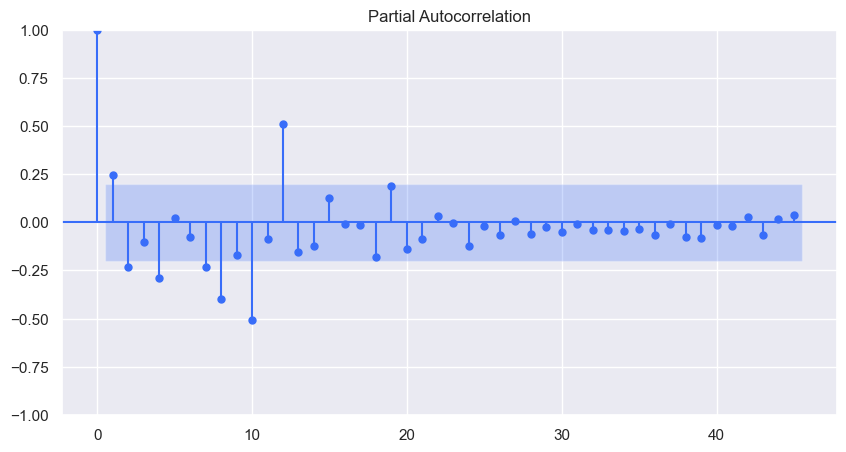

In [13]:
plot_pacf(df['First Order'],lags=45);

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can see direct correlation with 12 lags variable.<h3>

In [14]:
# Second order 
acfs_2 = acf(df['Second Order'][1:],nlags=45)
acfs_2

array([ 1.        , -0.20537992, -0.2393192 ,  0.04757594, -0.24250427,
        0.04586693,  0.1866337 ,  0.03359881, -0.22433579,  0.0987996 ,
       -0.24171494, -0.11537717,  0.72720852, -0.11137763, -0.24155722,
        0.06924719, -0.20653393,  0.07686815,  0.09713519,  0.07164847,
       -0.2250377 ,  0.08093698, -0.16604899, -0.08160666,  0.55613013,
       -0.07484594, -0.21699755,  0.04177315, -0.10054397,  0.03772015,
        0.06795533,  0.05632775, -0.17577864,  0.02092038, -0.05837416,
       -0.09955504,  0.4366364 , -0.03683987, -0.19220239, -0.00261661,
       -0.01951627,  0.00483576,  0.08090724,  0.03726828, -0.16910989,
        0.02237893])

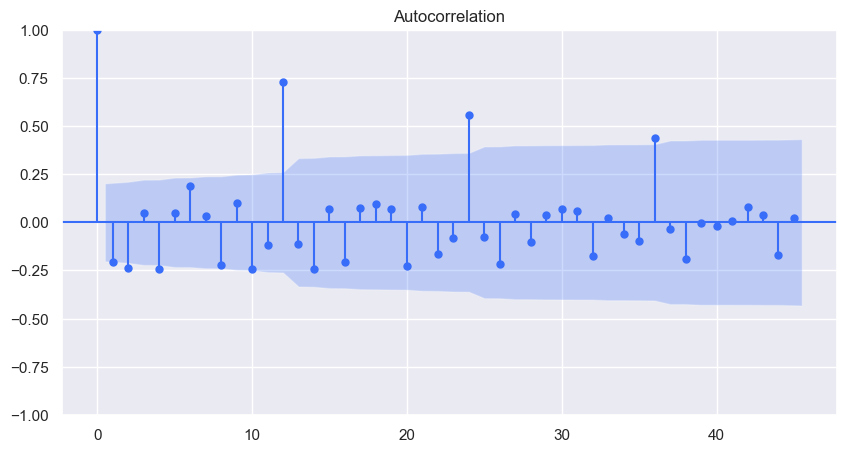

In [15]:
plot_acf(df['Second Order'][1:],lags=45);

In [16]:
# PACF
pacfs_2 = pacf(df['Second Order'][1:],nlags=45)
pacfs_2

array([ 1.00000000e+00, -2.07588310e-01, -3.00567003e-01, -9.10627201e-02,
       -3.90481050e-01, -1.98703931e-01, -6.26182808e-02,  3.15016190e-02,
       -3.27480492e-01, -4.62461766e-02, -5.51475897e-01, -8.32188686e-01,
       -1.65012534e-01, -1.33129678e-01, -7.09412097e-01, -1.45134691e+00,
        3.00264787e+00,  8.34482155e-01,  2.15714224e-01,  6.38449285e-01,
        5.93856218e-01,  6.38559580e-01,  1.82924349e+00, -2.40569375e+00,
       -7.96379986e-01, -5.79713843e-01, -6.35696394e-01, -9.50239058e-01,
       -1.83659558e+01,  1.04262437e+00,  4.65260979e-01,  4.83836053e-01,
        5.62202400e-01,  5.24606911e-01,  1.14922603e+00, -7.88701127e+00,
       -9.24888111e-01, -4.09405793e-01, -2.99150544e-01, -5.10515022e-01,
       -6.41771348e-01, -7.60521849e-01, -1.03414495e+00,  4.45386251e+01,
        9.74884563e-01,  1.07319217e+00])

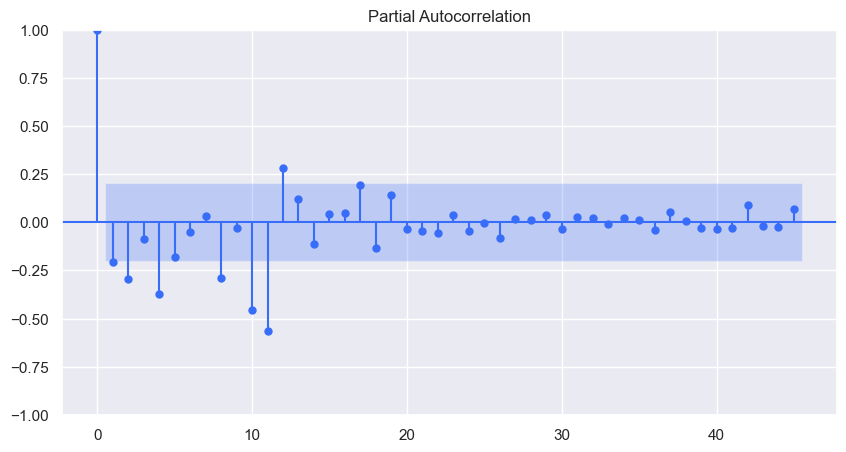

In [17]:
plot_pacf(df['Second Order'][1:],lags=45);

# 5 - Model & Prediction

In [18]:
to_row = int(len(df)*0.8) + 1
train = df.iloc[:to_row]
test = df.iloc[to_row:]

<h3 style="color:black; font-family: Arial;">Model Using Intitution</h3>


In [19]:
n_forecast = len(test)
train_list = list(train['Passengers'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(12,1,12))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:21<00:00,  1.18s/it]


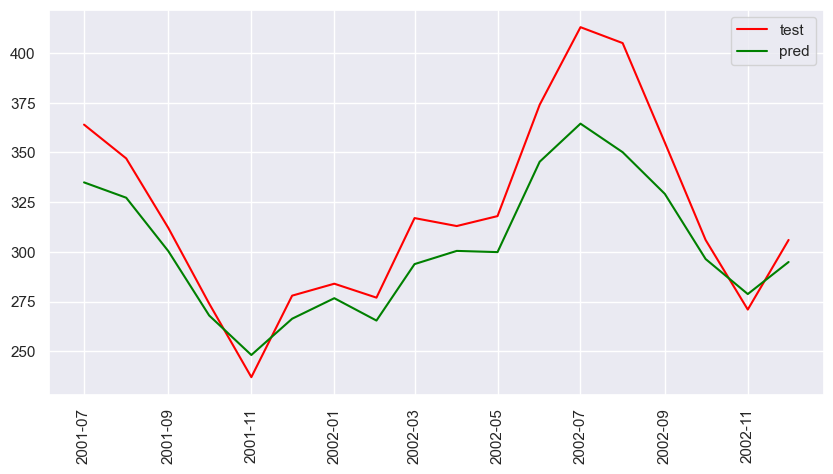

In [20]:
plt.plot(test.index,test['Passengers'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
mse = np.sqrt(mean_squared_error(test['Passengers'].values,preds))
mse

23.56601180470917

<h3 style="color:black; font-family: Arial;">Using auto arima</h3>


In [22]:
from pmdarima import auto_arima

In [23]:
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
n_forecast = len(test)
train_list = list(train['Passengers'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(3,1,2))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 11.31it/s]


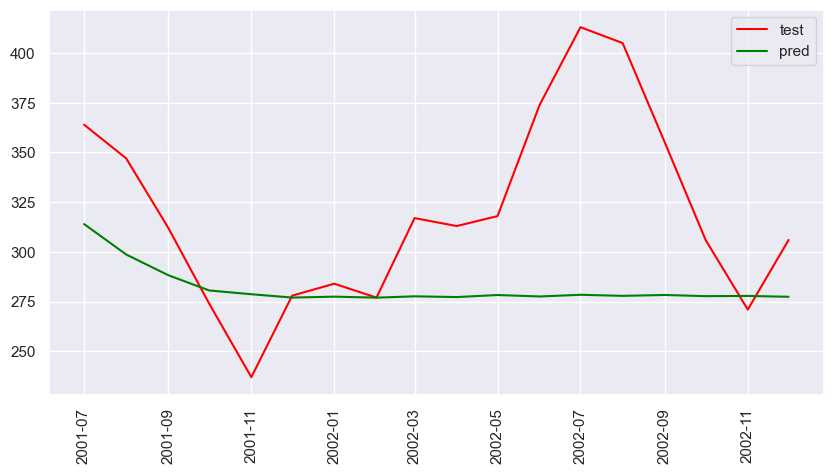

In [25]:
plt.plot(test.index,test['Passengers'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [26]:
mse2 = np.sqrt(mean_squared_error(test['Passengers'].values,preds))
mse2

59.02937803743174

# 6 - Experimental Model

In [27]:
n_forecast = len(test)
train_list = list(train['Passengers'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(12,1,4))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:12<00:00,  1.46it/s]


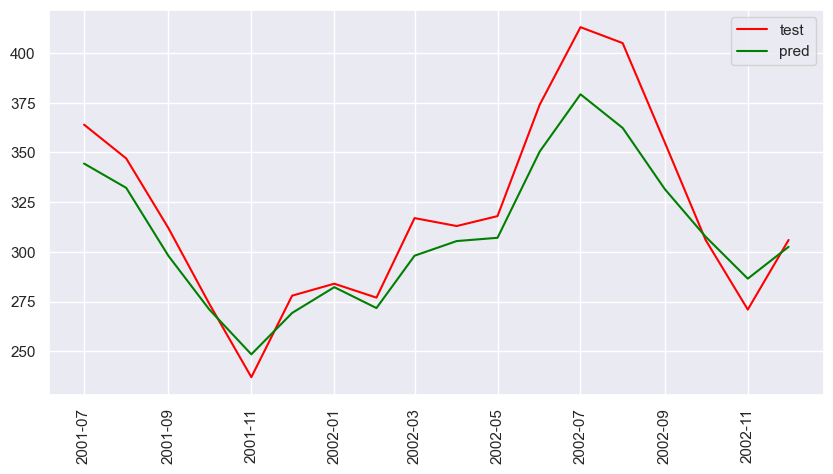

In [28]:
plt.plot(test.index,test['Passengers'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [29]:
mse3 = np.sqrt(mean_squared_error(test['Passengers'].values,preds))
mse3

18.098497489227025

In [30]:
out_data = {
    'Model': ['Intitution Model','Auto Arima Model','Experimental Model'],
    'Lag Variable': [12,3,12],
    'Order': [(12,1,12),(3,1,2),(12,1,4)],
    'MSE': [mse,mse2,mse3]
}

pd.DataFrame(out_data)

,Model,Lag Variable,Order,MSE
0,Intitution Model,12,"(12, 1, 12)",23.566012
1,Auto Arima Model,3,"(3, 1, 2)",59.029378
2,Experimental Model,12,"(12, 1, 4)",18.098497
